##Introduction

> ### **Scenario**
A smart device used by Individuals collects Data about thier Excercise, Calories lost, total Steps made, Intensities of Excercise, Sleep, etc.<br><br>The client has asked us to Analyze the Data to indentify areas with opportunity to grow.<br><br>Our goal is to understand the Data to fetch Insights and Trends/Patterns about the Consumers Behavior. Using this Information we can Anticipate thier behavior/patterns and tailor our marketing strategy respectively.

> ### About the Data
The Data comes from a Tracker Band from the Consumers. It contains Personal Fitness Metrics of about 33 Unique Individuals.<br><br>
We are using 10 Datasets:
* 4 Daily Info files which we will merge into one DataFrame.<br>
* 3 Hourly Info file which will also be merged into one DataFrame.<br>
* 1 for Heart Rate, 1 for Weight Info, 1 for Sleep Info.<br>

> ### **Process**
EDA and Cleaning:<br><br>
Utilizing Python we will clean these Datasets before working on them.
It's rich ecosystem of Libraries makes performing manipulation tasks extremly comfortable. This ensure our Data is in the best possible condition before importing it into SQL Servers.<br><br>
Setting up a Server:<br><br>
We will Store and Merge our data in a SQL Server because SQL is excellent at handling data. This ensures the Integrity of our data and also helps us create backups while connecting the databse to different softwares/interface. Data Security can be seamlessly implemented by making user authentication, role-based access control and encryption.<br><br>
Visualization:<br><br>
Tableau excels at converting raw data into dynamic and interactive visualizations. It can connect to wide range of data sources like SQL Servers, Cloud Services, Excel, Big Data and many more.
For this case we will connect our Microsoft SQL Server to Tableau. Making a connection instead of simply importing the data through a file is more efficient because we can access the lastest data refreshed in a click. If our data is been collected continuously we can automate a scheduled refresh to always have the current data. Tableau help in creating compelling data stories.
We can also seamless share our work across teams/departments/clients,etc.<br><br>
Dashboard Link: https://public.tableau.com/views/FitnessInfoDashboard/Dashboard2?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link
<br><br>
Making Recommendations:<br><br>
After Analyzing the Insigths we will be able to make recommendations to improve performance. Some alerts/signals to keep the consumer motivated, have some basic challenges, make a feedback system,etc.

###Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Understanding the Daily Data

In [ ]:
df1 = pd.read_csv("DAIntesities_M.csv")
df2 = pd.read_csv('DADistance_M.csv')

In [ ]:
df1.head()

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,2016-04-12,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,2016-04-13,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,2016-04-14,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,2016-04-15,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,2016-04-16,773,221,10,36,0.0,5.04,0.41,2.71


In [ ]:
df1.shape

(940, 10)

In [ ]:
df1.Id.nunique()

33

In [ ]:
#Gives us some Understanding of our Data by providing quick but Crucial Metrics
df1.describe()

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,991.210638,192.812766,13.564894,21.164894,0.001606,3.340819,0.567543,1.502681
std,2.424805e+09,301.267437,109.174700,19.987404,32.844803,0.007346,2.040655,0.883580,2.658941
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,729.750000,127.000000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000
50%,4.445115e+09,1057.500000,199.000000,6.000000,4.000000,0.000000,3.365000,0.240000,0.210000
75%,6.962181e+09,1229.500000,264.000000,19.000000,32.000000,0.000000,4.782500,0.800000,2.052500
max,8.877689e+09,1440.000000,518.000000,143.000000,210.000000,0.110000,10.710000,6.480000,21.920000


In [ ]:
#Initiallizing the Pallet for Visuals
sns.set_palette('plasma')

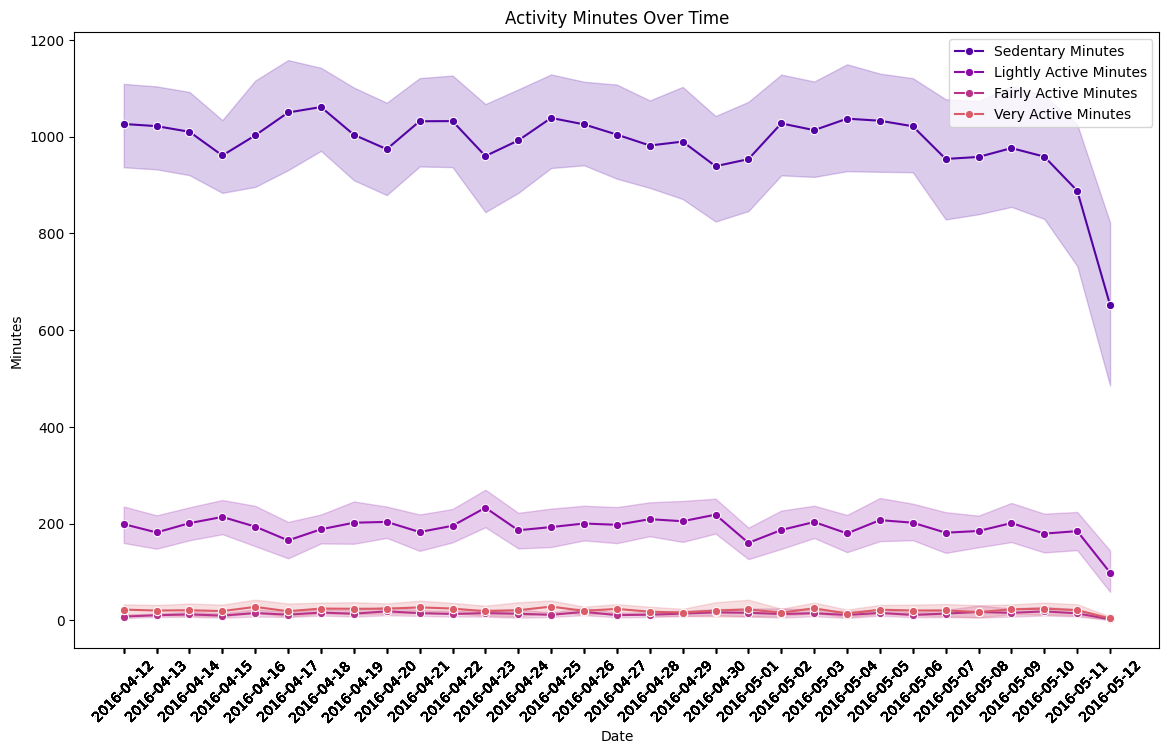

In [ ]:
#Visualizing the Intesity of Excersice done each Day in Minutes
plt.figure(figsize=(14, 8))
sns.lineplot(data=df1, x='ActivityDay', y='SedentaryMinutes', label='Sedentary Minutes', marker='o')
sns.lineplot(data=df1, x='ActivityDay', y='LightlyActiveMinutes', label='Lightly Active Minutes', marker='o')
sns.lineplot(data=df1, x='ActivityDay', y='FairlyActiveMinutes', label='Fairly Active Minutes', marker='o')
sns.lineplot(data=df1, x='ActivityDay', y='VeryActiveMinutes', label='Very Active Minutes', marker='o')
plt.xticks(ticks=df1['ActivityDay'][::2], rotation = 45)    #Skipping every other Date to avoid Clutter
plt.title('Activity Minutes Over Time')
plt.xlabel('Date')
plt.ylabel('Minutes')
plt.legend()
plt.show()

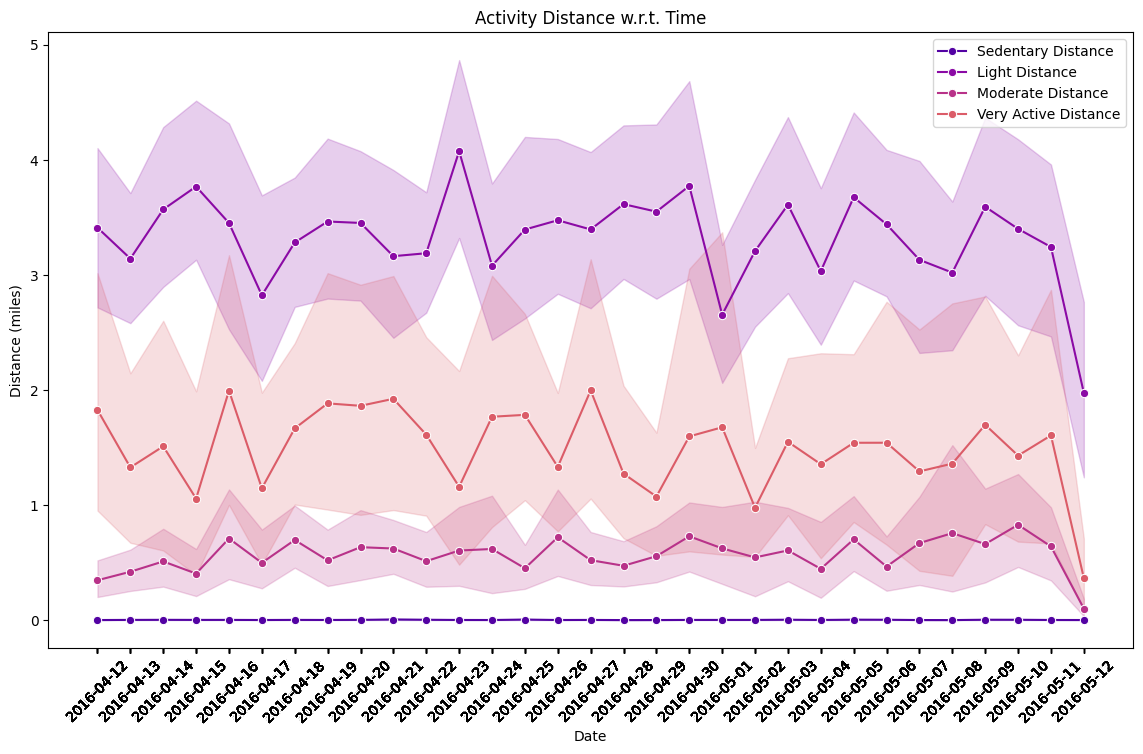

In [ ]:
#Visualizing the Intensity of the Distance covered each Day
plt.figure(figsize = (14, 8))
sns.lineplot(data = df1, x = 'ActivityDay', y = 'SedentaryActiveDistance', label = 'Sedentary Distance', marker='o')
sns.lineplot(data = df1, x = 'ActivityDay', y = 'LightActiveDistance', label = 'Light Distance', marker='o')
sns.lineplot(data = df1, x = 'ActivityDay', y = 'ModeratelyActiveDistance', label = 'Moderate Distance', marker='o')
sns.lineplot(data = df1, x = 'ActivityDay', y = 'VeryActiveDistance', label = 'Very Active Distance', marker='o')
plt.xticks(ticks = df1['ActivityDay'][::2], rotation = 45)  #Skipping every other Date to avoid Clutter
plt.title('Activity Distance w.r.t. Time')
plt.xlabel('Date')
plt.ylabel('Distance (miles)')
plt.legend()
plt.show()

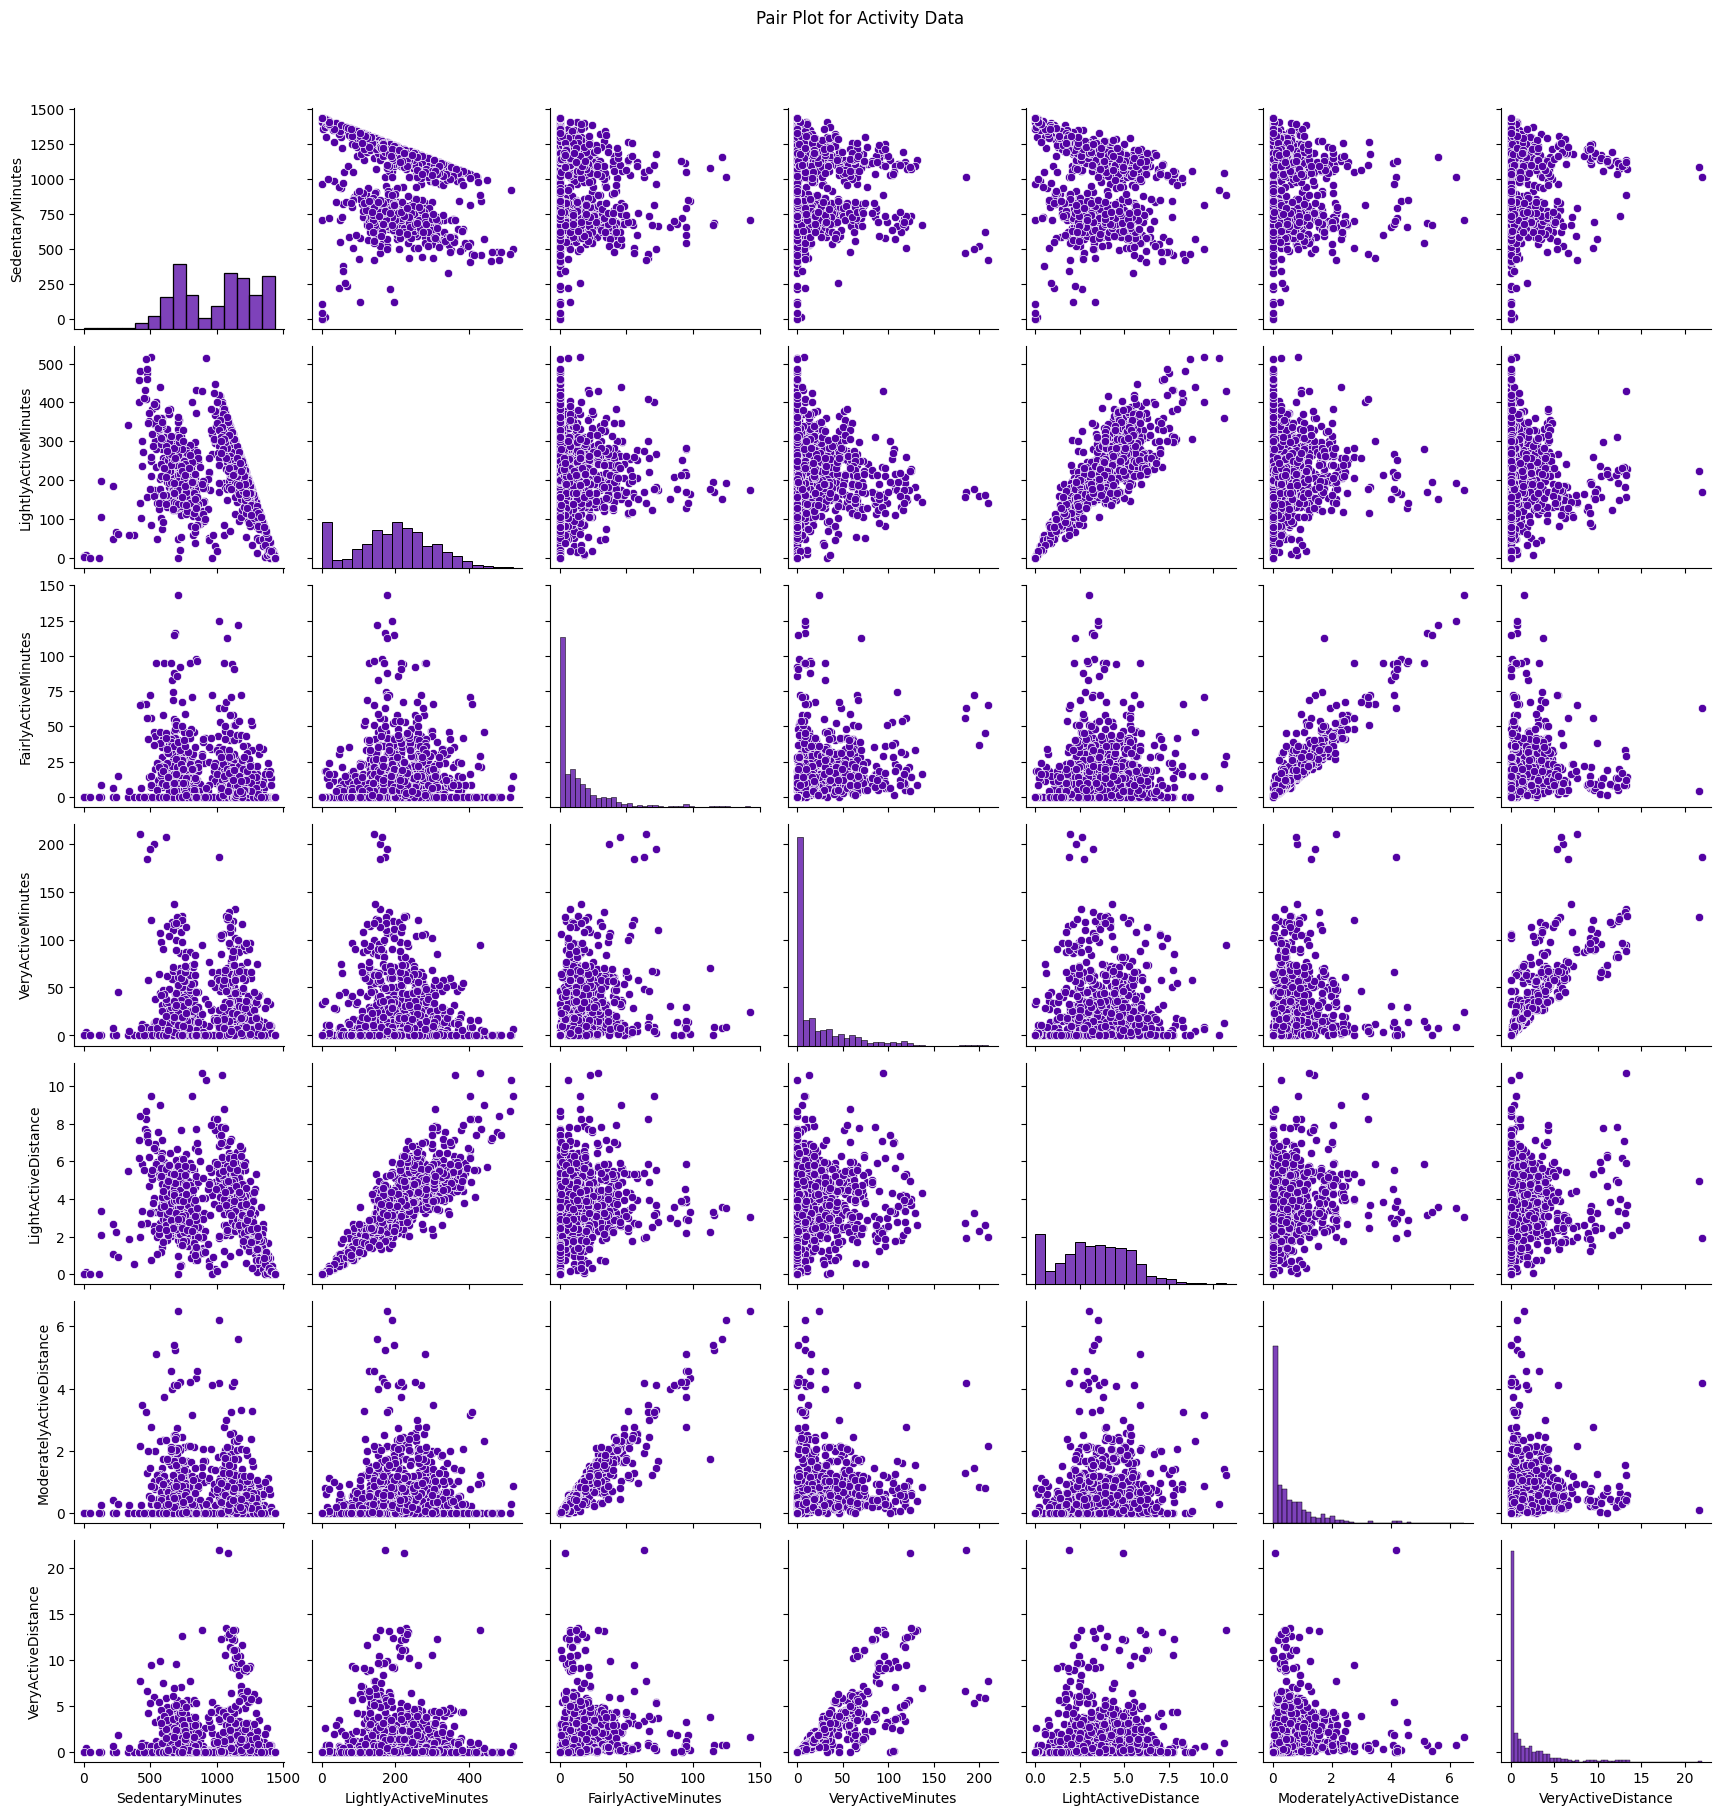

In [ ]:
#Making a Pair Plot for general understanding of parameters and thier correlations
sns.pairplot(df1[['SedentaryMinutes', 'LightlyActiveMinutes', 'FairlyActiveMinutes', 'VeryActiveMinutes',
                  'LightActiveDistance', 'ModeratelyActiveDistance', 'VeryActiveDistance']])
plt.suptitle('Pair Plot for Activity Data', y = 1.04)
plt.show()

>**Similar commands will be ran for each DataFrame to achive basic understanding of its structure and what it can provide.<br>
Data Cleaning has already been carried out so we won't bother checking for Nulls or Duplicates.<br>
Main Data Visualization will be carried out in Tableau.**

In [ ]:
df2.head()

,Id,ActivityDate,TotalDistance
0,1503960366,2016-04-12,8.50
1,1503960366,2016-04-13,6.97
2,1503960366,2016-04-14,6.74
3,1503960366,2016-04-15,6.28
4,1503960366,2016-04-16,8.16


In [ ]:
df2.shape

(940, 3)

In [ ]:
df2.Id.nunique()

33

In [ ]:
#Gives us some Understanding of our Data by providing quick but Crucial Metrics
df2.describe()

,Id,TotalDistance
count,9.400000e+02,940.000000
mean,4.855407e+09,5.489702
std,2.424805e+09,3.924606
min,1.503960e+09,0.000000
25%,2.320127e+09,2.620000
50%,4.445115e+09,5.245000
75%,6.962181e+09,7.712500
max,8.877689e+09,28.030000


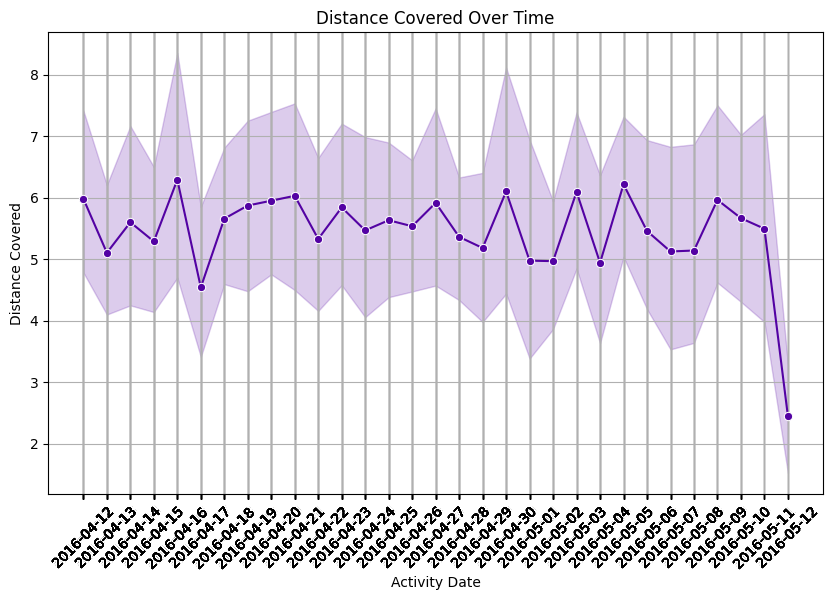

In [ ]:
#Trend for Distance Covered by Users w.r.t. Time
plt.figure(figsize = (10, 6))
sns.lineplot(data = df2, x = 'ActivityDate', y = 'TotalDistance', marker = 'o')
plt.xticks(ticks=df1['ActivityDay'][ : : 2], rotation = 45)  #Skipping every other Date to avoid Clutter
plt.title('Distance Covered Over Time')
plt.xlabel('Activity Date')
plt.ylabel('Distance Covered')
plt.xticks(rotation=45)
plt.grid(True)

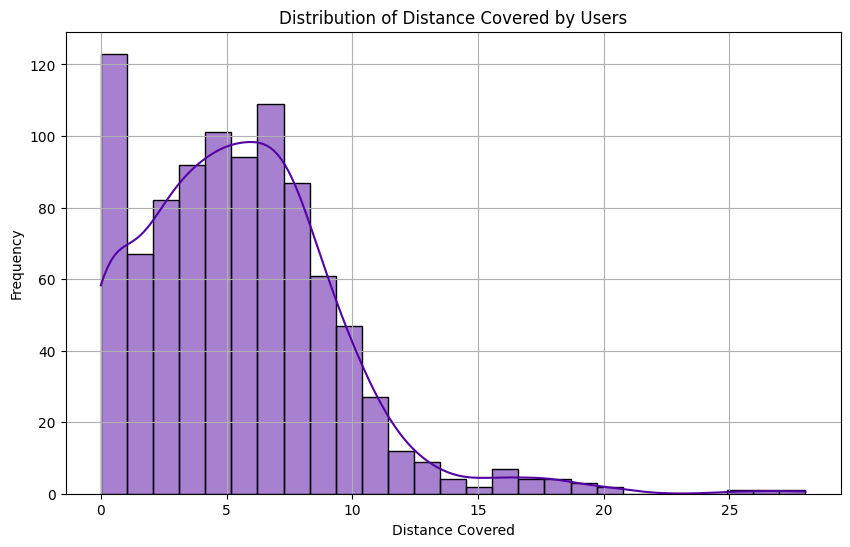

In [ ]:
#Distibution for Distance Covered
plt.figure(figsize = (10, 6))
sns.histplot(df2['TotalDistance'], kde = True)
plt.title('Distribution of Distance Covered by Users')
plt.xlabel('Distance Covered')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

We will use the Block of code below to compare the columns for DataFrame.<br>
If the columns contain the same values we can safely merge the data in SQL.

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityDay', 'ActivityDate')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id             True
ActivityDay    True
AllMatch       True
dtype: bool


>**Keeping df1 intact for Future Compraison.<br>
Changing the df2 to Study other DataFrame.**

In [ ]:
df2 = pd.read_csv('DACalories_M.csv')
df2.head()

,Id,ActivityDay,Calories
0,1503960366,2016-04-12,1985
1,1503960366,2016-04-13,1797
2,1503960366,2016-04-14,1776
3,1503960366,2016-04-15,1745
4,1503960366,2016-04-16,1863


In [ ]:
df2.shape

(940, 3)

In [ ]:
#Gives us some Understanding of our Data by providing quick but Crucial Metrics
df2.describe()

,Id,Calories
count,9.400000e+02,940.000000
mean,4.855407e+09,2303.609574
std,2.424805e+09,718.166862
min,1.503960e+09,0.000000
25%,2.320127e+09,1828.500000
50%,4.445115e+09,2134.000000
75%,6.962181e+09,2793.250000
max,8.877689e+09,4900.000000


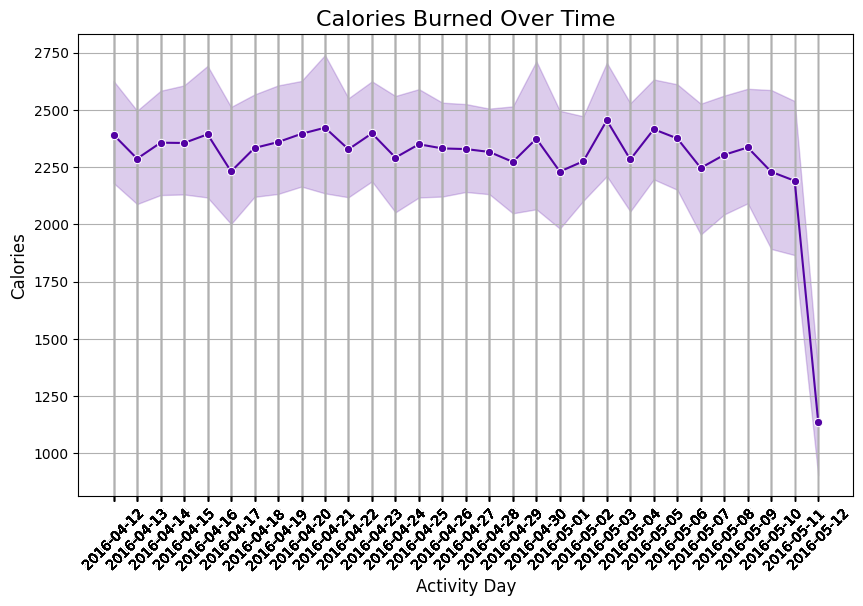

In [ ]:
#Basic Trend for Calories Burned by Users w.r.t. Time
plt.figure(figsize = (10, 6))
sns.lineplot(data = df2, x = 'ActivityDay', y = 'Calories', marker = 'o')
plt.xticks(ticks = df2['ActivityDay'][ : : 2], rotation = 45)  #Skipping every other Date to avoid Clutter
plt.title('Calories Burned Over Time', fontsize = 16)
plt.xlabel('Activity Day', fontsize = 12)
plt.ylabel('Calories', fontsize = 12)
plt.grid(True)
plt.show()

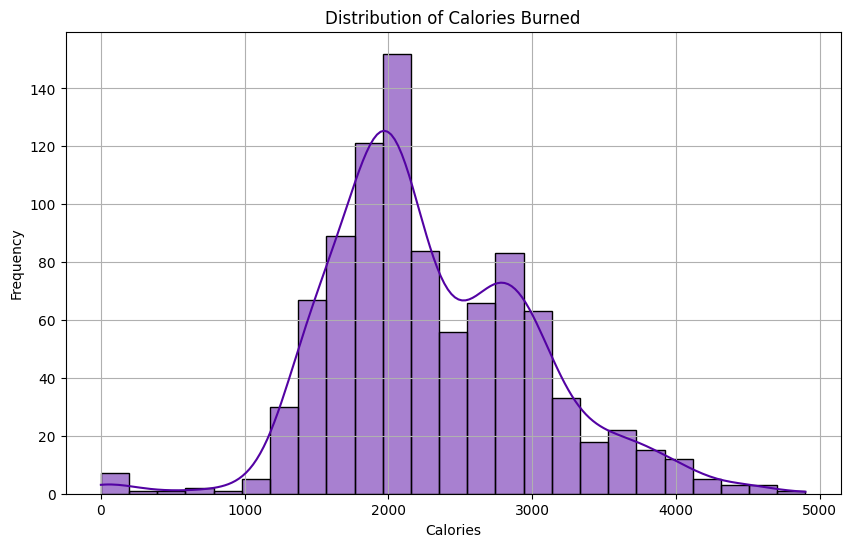

In [ ]:
#Distribution for Calories Burned
plt.figure(figsize = (10, 6))
sns.histplot(df2['Calories'], kde = True)
plt.title('Distribution of Calories Burned')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityDay', 'ActivityDay')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id             True
ActivityDay    True
AllMatch       True
dtype: bool


In [ ]:
df2 = pd.read_csv('DASteps_M.csv')
df2.head()

,Id,ActivityDay,StepTotal
0,1503960366,2016-04-12,13162
1,1503960366,2016-04-13,10735
2,1503960366,2016-04-14,10460
3,1503960366,2016-04-15,9762
4,1503960366,2016-04-16,12669


In [ ]:
df2.shape

(940, 3)

In [ ]:
df2.Id.nunique()

33

In [ ]:
#Gives us some Understanding of our Data by providing quick but Crucial Metrics
df2.describe()

,Id,StepTotal
count,9.400000e+02,940.000000
mean,4.855407e+09,7637.910638
std,2.424805e+09,5087.150742
min,1.503960e+09,0.000000
25%,2.320127e+09,3789.750000
50%,4.445115e+09,7405.500000
75%,6.962181e+09,10727.000000
max,8.877689e+09,36019.000000


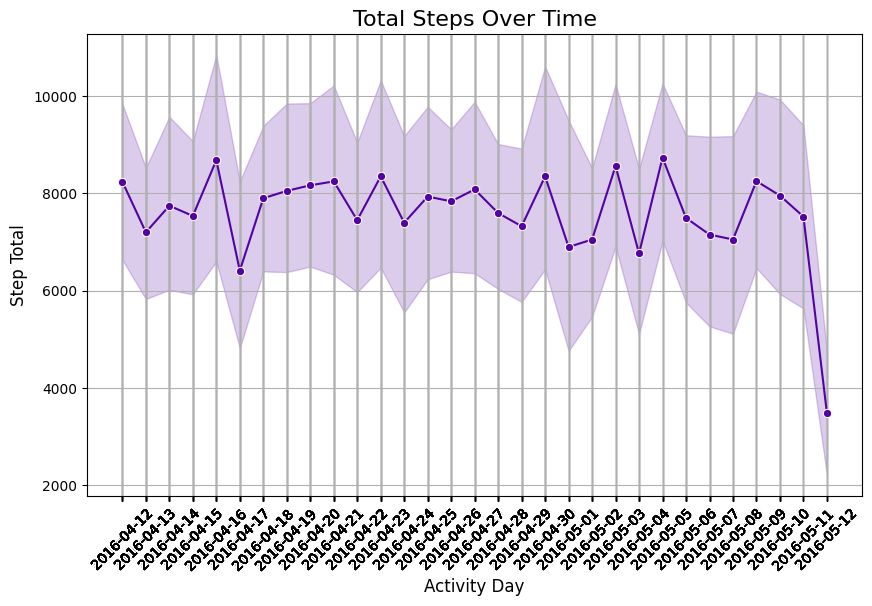

In [ ]:
#Basic Trend for Total Steps taken by Users w.r.t. Time
plt.figure(figsize = (10, 6))
sns.lineplot(data = df2, x = 'ActivityDay', y = 'StepTotal', marker = 'o')
plt.xticks(ticks = df2['ActivityDay'][ : : 2], rotation = 45)
plt.title('Total Steps Over Time', fontsize = 16)
plt.xlabel('Activity Day', fontsize = 12)
plt.ylabel('Step Total', fontsize = 12)
plt.grid(True)
plt.show()

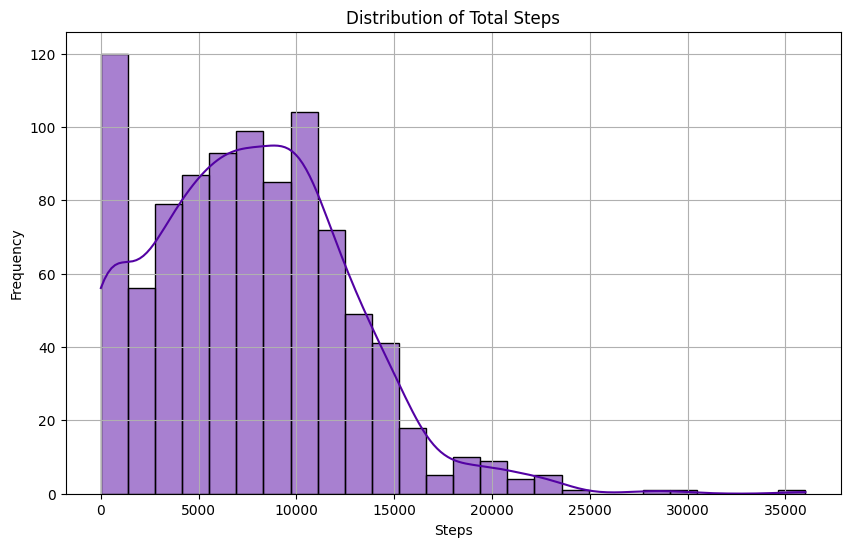

In [ ]:
#Distribution for Steps
plt.figure(figsize = (10, 6))
sns.histplot(df2['StepTotal'], kde = True,)
plt.title('Distribution of Total Steps')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityDay', 'ActivityDay')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id             True
ActivityDay    True
AllMatch       True
dtype: bool


#Understanding the Hourly Data

>**The Daily DataFrames gives us a good understanding of our data.<br>
Therefore, we won't do general visuals for Hourly DataFrames as we have already planned to do the Major Visualization in Tableau.**

In [ ]:
df1 = pd.read_csv("HCalories_M.csv")
df2 = pd.read_csv('HIntensities_M.csv')

In [ ]:
df1.head()

,Id,ActivityHour,Calories
0,1503960366,2016-04-12 00:00:00,81
1,1503960366,2016-04-12 01:00:00,61
2,1503960366,2016-04-12 02:00:00,59
3,1503960366,2016-04-12 03:00:00,47
4,1503960366,2016-04-12 04:00:00,48


In [ ]:
df1.shape

(22099, 3)

In [ ]:
df1.Id.nunique()

33

In [ ]:
#Gives us some Understanding of our Data by providing quick but Crucial Metrics
df1.describe()

,Id,Calories
count,2.209900e+04,22099.000000
mean,4.848235e+09,97.386760
std,2.422500e+09,60.702622
min,1.503960e+09,42.000000
25%,2.320127e+09,63.000000
50%,4.445115e+09,83.000000
75%,6.962181e+09,108.000000
max,8.877689e+09,948.000000


In [ ]:
df2.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [ ]:
df2.shape

(22099, 4)

In [ ]:
df2.Id.nunique()

33

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityHour', 'ActivityHour')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id              True
ActivityHour    True
AllMatch        True
dtype: bool


In [ ]:
df2 = pd.read_csv('HSteps_M.csv')

In [ ]:
df2.head()

,Id,ActivityHour,StepTotal
0,1503960366,2016-04-12 00:00:00,373
1,1503960366,2016-04-12 01:00:00,160
2,1503960366,2016-04-12 02:00:00,151
3,1503960366,2016-04-12 03:00:00,0
4,1503960366,2016-04-12 04:00:00,0


In [ ]:
df2.shape

(22099, 3)

In [ ]:
df2.Id.nunique()

33

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityHour', 'ActivityHour')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id              True
ActivityHour    True
AllMatch        True
dtype: bool


In [ ]:
df2 = pd.read_csv('HIntensities_M.csv')

In [ ]:
df2.head()

,Id,ActivityHour,TotalIntensity,AverageIntensity
0,1503960366,2016-04-12 00:00:00,20,0.333333
1,1503960366,2016-04-12 01:00:00,8,0.133333
2,1503960366,2016-04-12 02:00:00,7,0.116667
3,1503960366,2016-04-12 03:00:00,0,0.000000
4,1503960366,2016-04-12 04:00:00,0,0.000000


In [ ]:
df2.shape

(22099, 4)

In [ ]:
df2.Id.nunique()

33

In [ ]:
columns_to_compare = [('Id', 'Id'), ('ActivityHour', 'ActivityHour')]

#Creating a new DataFrame to store the comparison results into
comparison_results = pd.DataFrame()

#Comparing each Column
for col1, col2 in columns_to_compare:
    comparison_results[col1] = df1[col1] == df2[col2]

#Checking if all values in comparison_results are True
comparison_results['AllMatch'] = comparison_results.all(axis = 1)

summary = comparison_results.all()

print("Comparison Summary:")
print(summary)

Comparison Summary:
Id              True
ActivityHour    True
AllMatch        True
dtype: bool


# Understanding the Sleep, Weight and Heart Rate Data

In [ ]:
df = pd.read_csv('Sleep Info.csv')

In [ ]:
df.head()

,SleepID,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1,1503960366,2016-04-12,1,327,346
1,2,1503960366,2016-04-13,2,384,407
2,3,1503960366,2016-04-15,1,412,442
3,4,1503960366,2016-04-16,2,340,367
4,5,1503960366,2016-04-17,1,700,712


In [ ]:
df.shape

(413, 6)

In [ ]:
df.Id.nunique()

24

In [ ]:
df.describe()

,SleepID,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,413.000000,4.130000e+02,413.000000,413.000000,413.000000
mean,207.000000,5.000979e+09,1.118644,419.467312,458.639225
std,119.367081,2.060360e+09,0.345521,118.344679,127.101607
min,1.000000,1.503960e+09,1.000000,58.000000,61.000000
25%,104.000000,3.977334e+09,1.000000,361.000000,403.000000
50%,207.000000,4.702922e+09,1.000000,433.000000,463.000000
75%,310.000000,6.962181e+09,1.000000,490.000000,526.000000
max,413.000000,8.792010e+09,3.000000,796.000000,961.000000


In [ ]:
df = pd.read_csv('Weight Info.csv')

In [ ]:
df.head()

,WeightID,Id,Date,WeightKg,WeightPounds,BMI,IsManualReport
0,1,1503960366,2016-05-02 23:59:59,52.6,115.96,22.65,True
1,2,1503960366,2016-05-03 23:59:59,52.6,115.96,22.65,True
2,3,1927972279,2016-04-13 01:08:52,133.5,294.32,47.54,False
3,4,2873212765,2016-04-21 23:59:59,56.7,125.00,21.45,True
4,5,2873212765,2016-05-12 23:59:59,57.3,126.32,21.69,True


In [ ]:
df.shape

(67, 7)

In [ ]:
df.Id.nunique()

8

In [ ]:
df.describe()

,WeightID,Id,WeightKg,WeightPounds,BMI
count,67.000000,6.700000e+01,67.000000,67.000000,67.000000
mean,34.000000,7.009282e+09,72.035821,158.810746,25.185224
std,19.485037,1.950322e+09,13.923206,30.695989,3.066962
min,1.000000,1.503960e+09,52.600000,115.960000,21.450000
25%,17.500000,6.962181e+09,61.400000,135.360000,23.960000
50%,34.000000,6.962181e+09,62.500000,137.790000,24.390000
75%,50.500000,8.877689e+09,85.050000,187.500000,25.560000
max,67.000000,8.877689e+09,133.500000,294.320000,47.540000


In [ ]:
df = pd.read_csv('Heart Rate Info.csv')

In [ ]:
df.head()

,RateID,Id,Time,Value
0,1,2022484408,2016-04-12 07:21:00,97
1,2,2022484408,2016-04-12 07:21:05,102
2,3,2022484408,2016-04-12 07:21:10,105
3,4,2022484408,2016-04-12 07:21:20,103
4,5,2022484408,2016-04-12 07:21:25,101


In [ ]:
df.shape

(2483658, 4)

In [ ]:
df.Id.nunique()

14

In [ ]:
df.describe()

,RateID,Id,Value
count,2.483658e+06,2.483658e+06,2.483658e+06
mean,1.241830e+06,5.513765e+09,7.732842e+01
std,7.169705e+05,1.950224e+09,1.940450e+01
min,1.000000e+00,2.022484e+09,3.600000e+01
25%,6.209152e+05,4.388162e+09,6.300000e+01
50%,1.241830e+06,5.553957e+09,7.300000e+01
75%,1.862744e+06,6.962181e+09,8.800000e+01
max,2.483658e+06,8.877689e+09,2.030000e+02


> # Conclusion
**Through our EDA Process we've noticed that the DataFrames for Daily Sets and Hourly have the same Id and Date/Day Columns respectively. This means we can merge them in our Database seamlessly.<br>
We cannot merge the data into one singular table because the total rows differ for each one. Regardless denormalizing the data isn't recommended. Using the SQL Server we will merge the data to create 2 new Table in our Schema. The other remainging datasets have already been convert in thier final form and will be import into our SQL Server.**

># Recommendation
1. **Sedentary Hours should be mitigated for healthier lifestyle.**
2. **Users should walk around 8000 Steps Daily.**
3. **Significant Amount of Users are Light on the Activities.**
4. **They should sleep for aprroximatly 7 hours a Day.**
5. **We can create a notifcation to promt them to excercise.**
6. **Can make simple workout drill as per the Activity Score.**
7. **Keep them motivated with supportive prompts.**